In [1]:
import numpy as np
import time, os, sys, glob
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
# from cellpose import models, io
# from cellpose import plot, utils

In [1]:
def get_pos_ratio(npy_file, channel=0, threshold=None):
    '''
    Inputs:
    -------
        - npy_file: segmentation file output from Cellpose
        - threshold: the value beyond which a segmentation is called positive
        - channel: the target channel to evaluate
        
    Outputs:
    --------
        - pos_ratio: a float number of the ratio of postivie segmentations
    '''
    dat = np.load(npy_file, allow_pickle=True).item()
    if len(dat['img'].shape) == 2:
        img = dat['img']
    else:
        img = dat['img'][channel]
    masks = dat['masks']
    n_label = np.max(masks)
    
    # get mean intensities for all masks
    mask_mean = []
    for i in range(1, n_label+1):
        temp = np.mean(img, where=(masks==i))
        mask_mean.append(temp)
    
    if threshold is None:
        out_mean = np.mean(img, where=(masks==0))
        out_std = np.std(img, where=(masks==0))
        threshold = out_mean + out_std
        
    n_pos = np.sum( np.array(mask_mean)>threshold )
    pos_ratio = n_pos / n_label
    
    return pos_ratio, n_pos, n_label, threshold

In [3]:
# calculate the ratio of cells/nuclei with positive NLS-mScarlet signals

# specify the data folder
data_folder = '../data/220601-X-188-blast-test/220601-X-188-add-blast-40x-output'

# the target channel NLS-mScarlet is channel 3 (2 due to 0-indexing)
CHANNEL = 2

# empirically, the background signal of NLS-mScarlet is ~10 (in the bud),
# we set the THRESHOLD to be higher to exclude some of the really dim ones
THRESHOLD = 50

# empty lists to store the output data
file_names, pos_ratio_blast, n_pos_blast, n_label_blast = [], [], [], []

npy_files = glob.glob(os.path.join(data_folder, '*.npy'))
for npy_file in npy_files:
    file_name = os.path.basename(npy_files[0])
    pos_ratio, n_pos, n_label, threshold = get_pos_ratio(npy_file,
                                                         channel=CHANNEL,
                                                         threshold=THRESHOLD)
    file_names.append(file_name)
    pos_ratio_blast.append(pos_ratio)
    n_pos_blast.append(n_pos)
    n_label_blast.append(n_label)

In [4]:
# calculate per sample positive ratios

# for the blast treated groups, I acquired 3 FOVs per sample,
# where I have 10 unique samples
N = 10

# create a zipped array 
n_pos_n_label = np.array(list(zip(n_pos_blast, n_label_blast)))
# split by sample for calculation
n_per_FOV_grouped = np.array_split(n_pos_n_label, N)
# calculate the total numbers per sample by summing up all FOVs
n_per_sample = np.sum(n_per_FOV_grouped, axis=1)
# calculate the ratios  
ratio_per_sample_blast = n_per_sample[:,0] / n_per_sample[:,1]


In [5]:
data_folder = '../data/220601-X-188-blast-test/220601-X-188-add-blast-40x-output'
output_file = os.path.join(data_folder, 'ratio_per_sample_blast.csv')
np.savetxt(output_file, ratio_per_sample_blast, delimiter=',')

In [13]:
temp = np.array(list(zip(pos_ratio_blast, n_pos_blast, n_label_blast)))
output_file = os.path.join(data_folder, 'ratio_Ns_per_file_blast.csv')
np.savetxt(output_file, temp, delimiter=',')

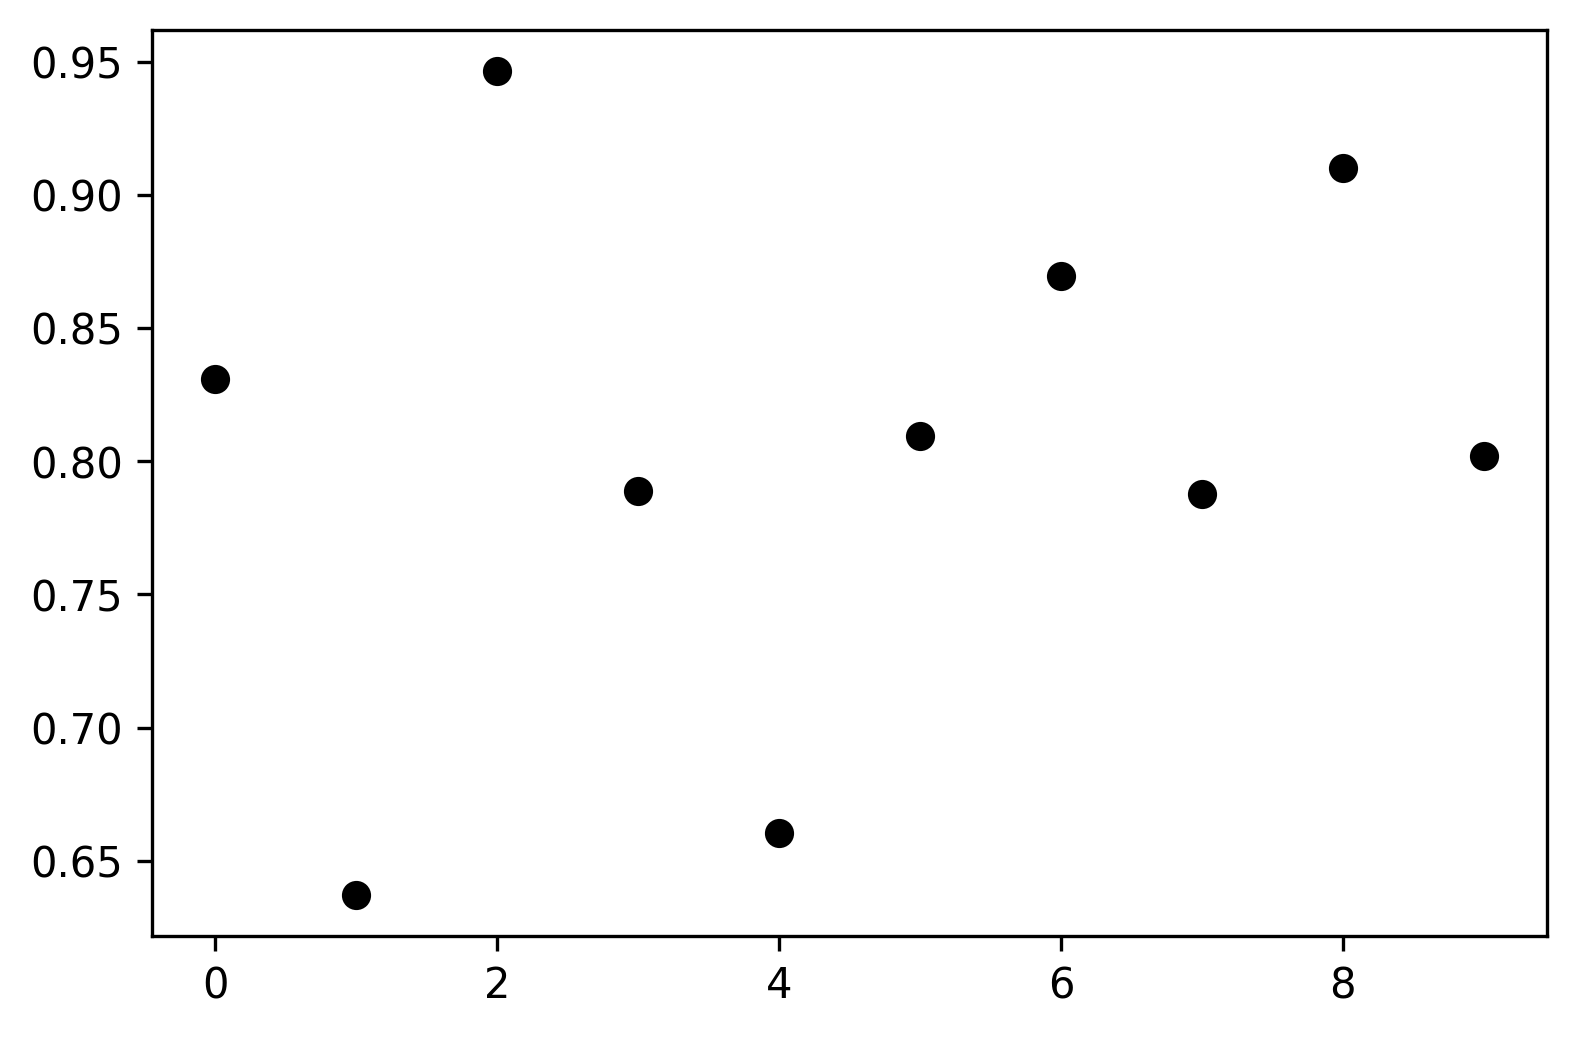

In [7]:
plt.plot(ratio_per_sample_blast, 'ok')

In [8]:
# calculate the ratio of cells/nuclei with positive NLS-mScarlet signals

# specify the data folder
data_folder = '../data/220601-X-188-blast-test/220601-X-188-no-blast-40x-output'

# the target channel NLS-mScarlet is channel 3 (2 due to 0-indexing)
CHANNEL = 2

# empirically, the background signal of NLS-mScarlet is ~10 (in the bud),
# we set the THRESHOLD to be higher to exclude some of the really dim ones
THRESHOLD = 50

# empty lists to store the output data
pos_ratio_no_blast, n_pos_no_blast, n_label_no_blast = [], [], []

npy_files = glob.glob(os.path.join(data_folder, '*.npy'))
for npy_file in npy_files:
    # file_name = os.path.basename(npy_files[0])
    pos_ratio, n_pos, n_label, threshold = get_pos_ratio(npy_file,
                                                         channel=CHANNEL,
                                                         threshold=THRESHOLD)
    pos_ratio_no_blast.append(pos_ratio)
    n_pos_no_blast.append(n_pos)
    n_label_no_blast.append(n_label)

In [9]:
# calculate per sample positive ratios

# for the blast treated groups, I acquired 2 FOVs per sample,
# where I have 10 unique samples
N = 10

# create a zipped array 
n_pos_n_label = np.array(list(zip(n_pos_no_blast, n_label_no_blast)))
# split by sample for calculation
n_per_FOV_grouped = np.array_split(n_pos_n_label, N)
# calculate the total numbers per sample by summing up all FOVs
n_per_sample = np.sum(n_per_FOV_grouped, axis=1)
# calculate the ratios  
ratio_per_sample_no_blast = n_per_sample[:,0] / n_per_sample[:,1]


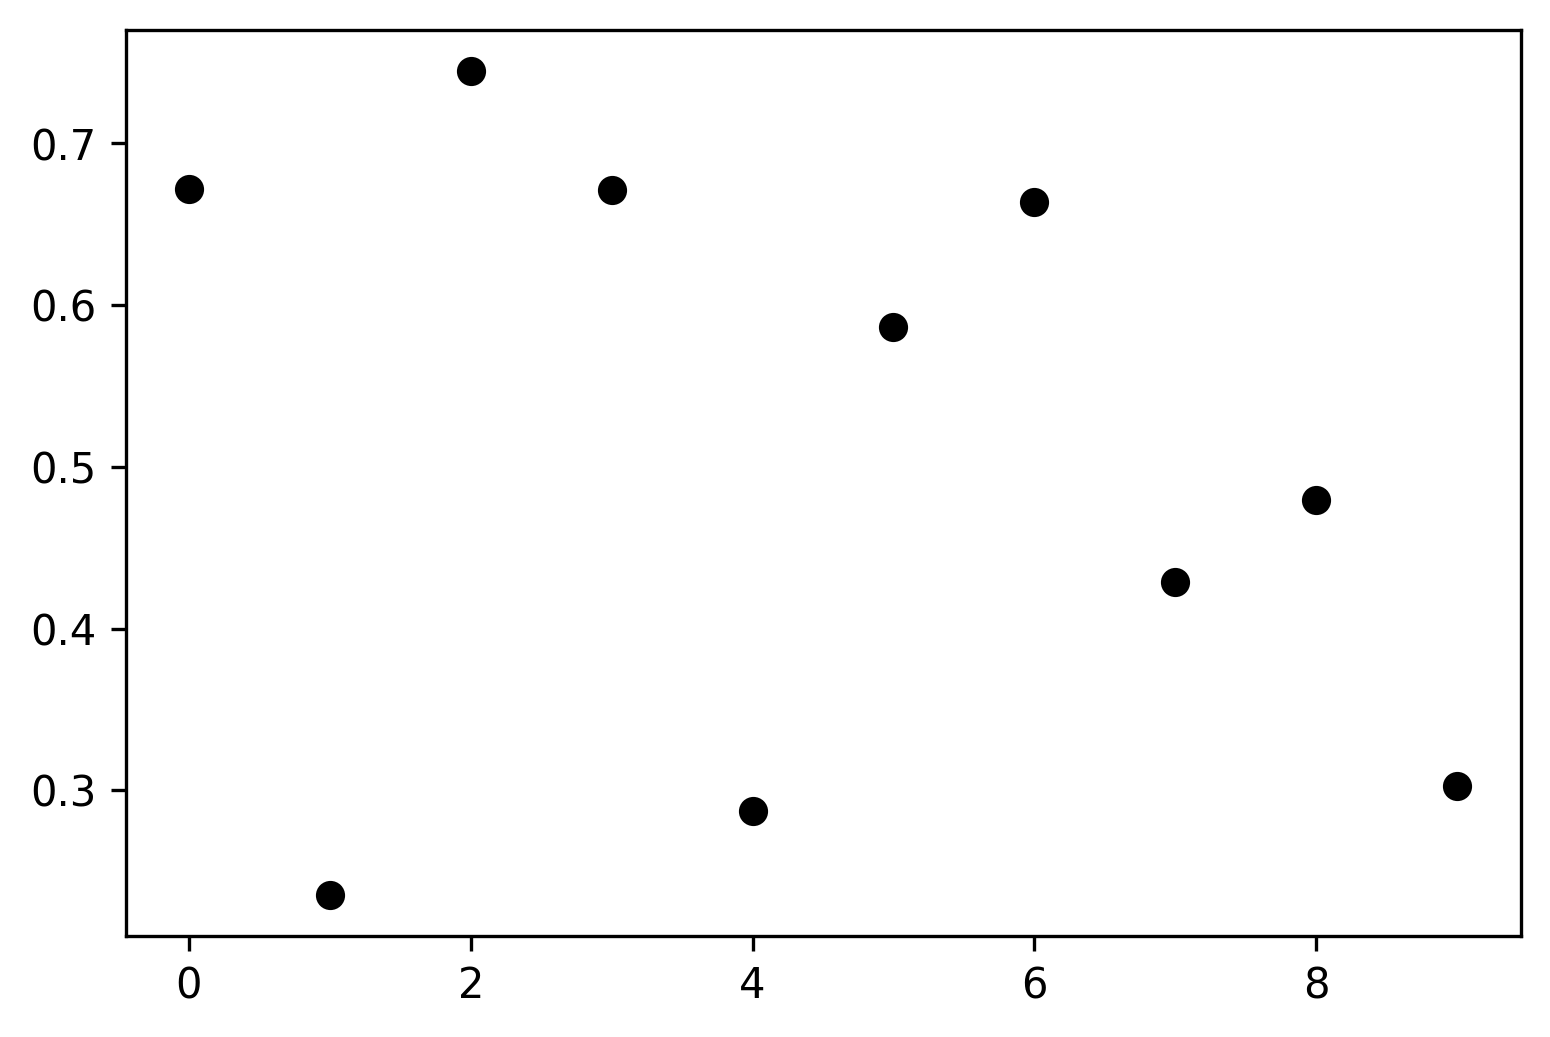

In [10]:
plt.plot(ratio_per_sample_no_blast, 'ok')

In [11]:
ratio_per_sample_no_blast.shape

(10,)

In [12]:
data_folder = '../data/220601-X-188-blast-test/220601-X-188-no-blast-40x-output'
output_file = os.path.join(data_folder, 'ratio_per_sample_no_blast.csv')
np.savetxt(output_file, ratio_per_sample_no_blast, delimiter=',')

In [14]:
temp = np.array(list(zip(pos_ratio_no_blast, n_pos_no_blast, n_label_no_blast)))
output_file = os.path.join(data_folder, 'ratio_Ns_per_file_no_blast.csv')
np.savetxt(output_file, temp, delimiter=',')